In [104]:
# Data manipulation
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# This magic command displays plots directly in the notebook
%matplotlib inline
# Statistics
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler


In [105]:
df=pd.read_csv('Housing.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [106]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [107]:
#change no to 0 and yes to 1

cols_to_change=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
df.loc[:, cols_to_change] = df.loc[:, cols_to_change].replace({'no': 0, 'yes': 1})



In [108]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,semi-furnished
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,semi-furnished
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,unfurnished
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,furnished
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,unfurnished


In [109]:
df=df.join(pd.get_dummies(df.furnishingstatus)).drop(['furnishingstatus'],axis=1)


In [110]:
cols_to_change=['furnished','semi-furnished','unfurnished']
df.loc[:, cols_to_change] = df.loc[:, cols_to_change].replace({False: 0, True: 1})

In [111]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,0,1,0
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,0,1,0
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,0,0,1
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,1,0,0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,0,0,1


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'parking'}>],
       [<Axes: title={'center': 'furnished'}>,
        <Axes: title={'center': 'semi-furnished'}>,
        <Axes: title={'center': 'unfurnished'}>]], dtype=object)

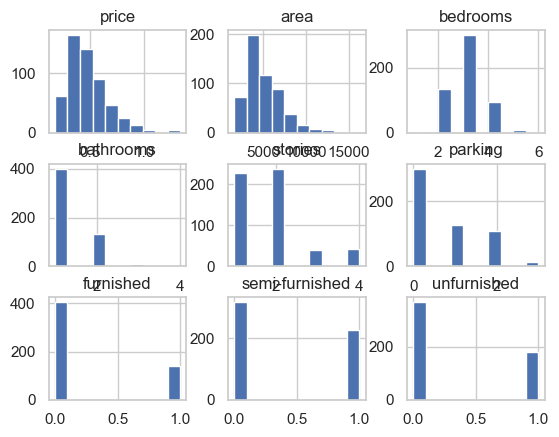

In [112]:
df.hist()

<Axes: >

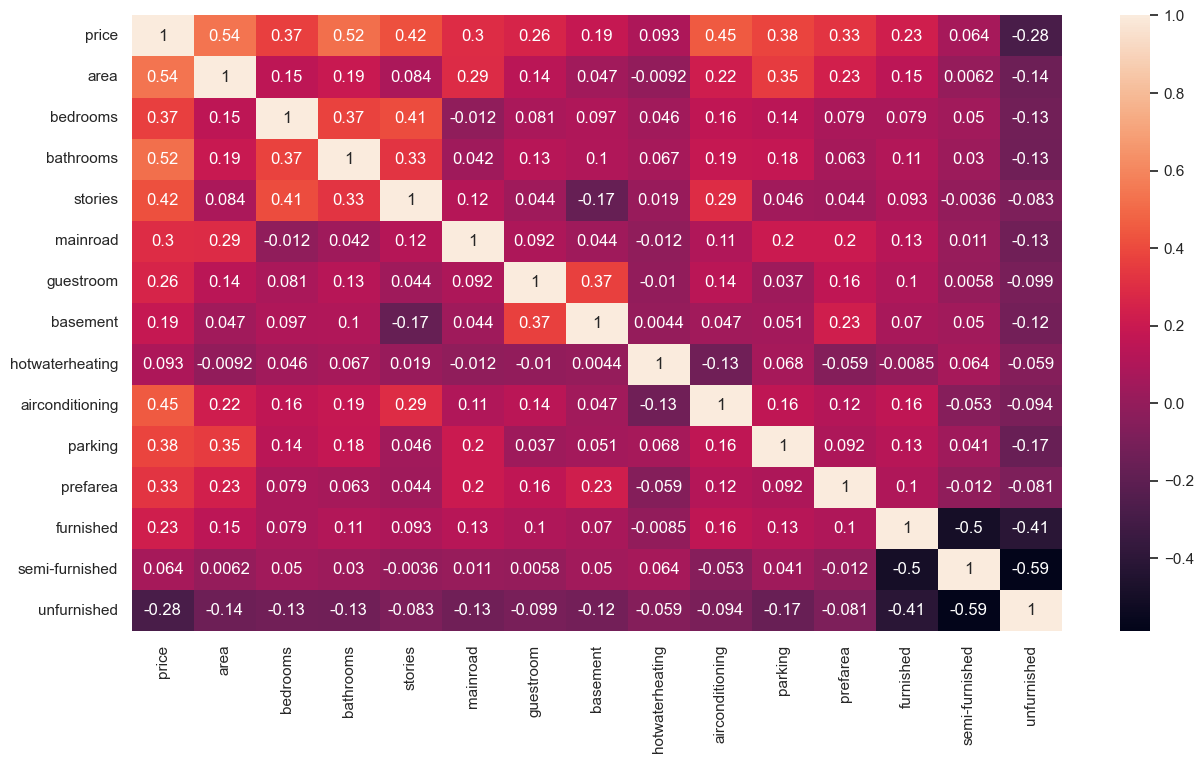

In [113]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

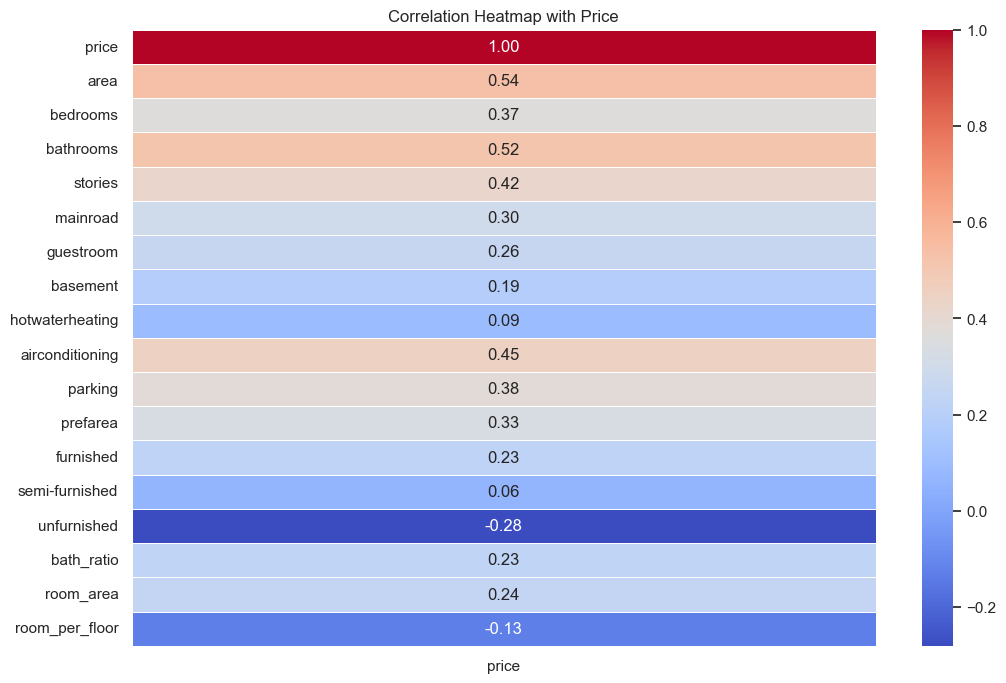

In [129]:


# Assuming df is your DataFrame
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['price']], annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap with Price')
plt.show()


In [115]:
df['bath_ratio']=df['bathrooms']/df['bedrooms']
df['room_area']=df['area']/df['bedrooms']
df['room_per_floor']=df['bedrooms']/df['stories']

In [116]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished,bath_ratio,room_area,room_per_floor
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0,0.500000,1855.0,1.333333
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0,1.000000,2240.0,1.000000
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0,0.666667,3320.0,1.500000
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0,0.500000,1875.0,2.000000
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0,0.250000,1855.0,2.000000


<Axes: >

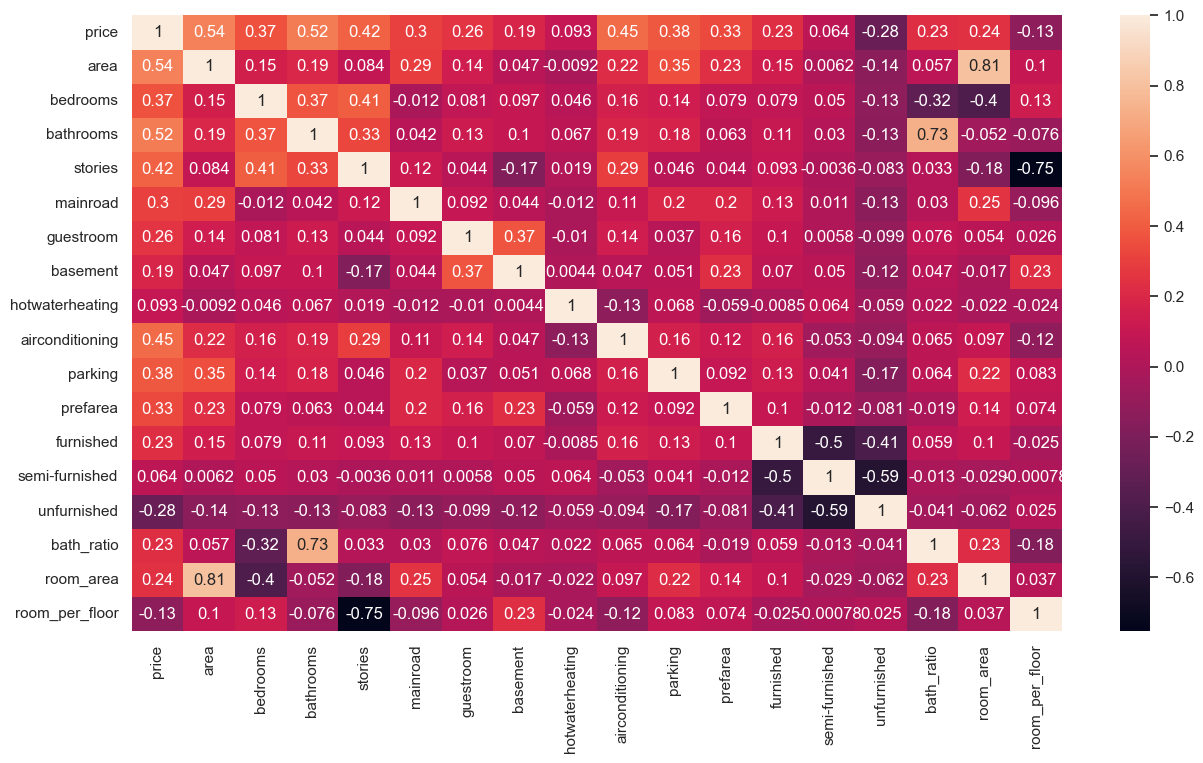

In [117]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

In [130]:
#seperate feature X and y
X=df.drop(['price'],axis=1)
y = df['price']

#test train split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #20% test 





In [134]:
from sklearn.model_selection import cross_val_score

# Initialize the linear regression model
model = LinearRegression()

# Perform k-fold cross-validation
scores = cross_val_score(model, X, y, cv=5) # Here, cv=5 denotes 5-fold cross-validation

print("Cross-validated scores:", scores)
print("Mean cross-validated score:", scores.mean())


Cross-validated scores: [ -2.05766097  -5.42536858 -16.00299744 -20.41215116  -5.27211322]
Mean cross-validated score: -9.834058276260773


In [132]:
model.score(X_train, y_train)


0.6965113022842182

In [133]:
model.score(X_test,y_test)

0.6449647388031903

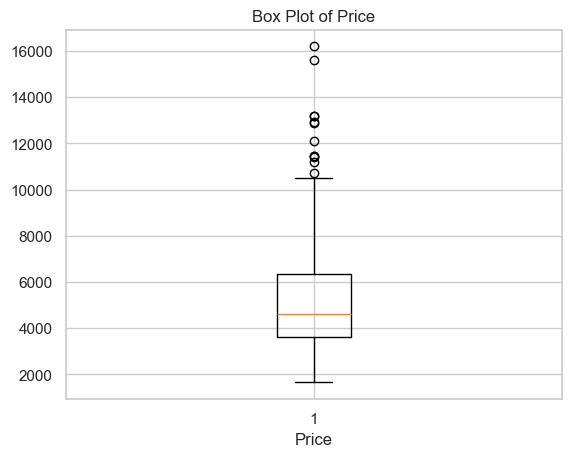

In [136]:


# Create a figure and axis
fig, ax = plt.subplots()

# Create a box plot
ax.boxplot(df['area'])

# Set the title and labels
ax.set_title('Box Plot of Price')
ax.set_xlabel('Price')

# Show the plot
plt.show()


In [138]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=300)
forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300)

In [139]:
forest.score(X_train, y_train)

0.9485081917616899

In [140]:
forest.score(X_test, y_test)

0.5814182548671668